## Importing Required Modules

In [1]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns

## Importing/Creating Data

Let's create some data.

In [2]:
X=np.array(range(10))
print(f"Input Data is: {X}")

Input Data is: [0 1 2 3 4 5 6 7 8 9]


In [3]:
Y=2*X+2
print(f"Output data is: {Y}")

Output data is: [ 2  4  6  8 10 12 14 16 18 20]


So that's it for creating/importing the data. For the first example i want to start with something simple which will makes it easy to understand all the calculations.

### Visualize the data

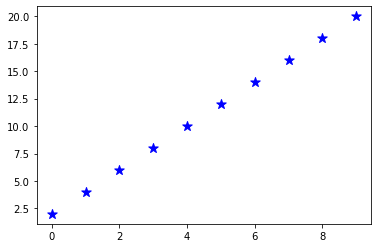

In [4]:
plt.scatter(X,Y,s=100,color='blue',marker = "*")
plt.show()

## Making Predictions

Create a function for making predictions. 
                       $Y = w \times X +b$
Where X is one dimensional input feature and Y is output. w is weight and b is bias value.

In [5]:
def pred1D(X,w,b):
        
    """ In this function:
        X is 1D np array
        Y is 1D np array
        w (weight) is a single value
        b (bias) is also a single value
        
        Y = w*X+b
    """
    Y = X*w +b
    
    return Y
    

Let's initialize some random weight and bais and make some predictions

In [6]:
W_init = 1 # Initial weight
b_init = 2  # Initial bais
y_pred=pred1D(X,W_init,b_init)
y_pred

array([ 2,  3,  4,  5,  6,  7,  8,  9, 10, 11])

Pred1D is woring fine but due to incorrect weight and bais the predictions are incorrect. As shown in the figure below.

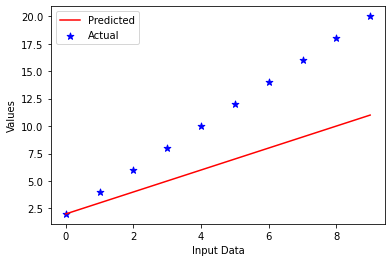

In [7]:
# Ploting both actual and predicted values
plt.scatter(X,Y,s=50,c='blue',marker="*",label="Actual")
plt.plot(X,y_pred,c='red',label = 'Predicted')
plt.xlabel("Input Data")
plt.ylabel("Values")
plt.legend()
plt.show()

Its show that prediction is way off than actual values so our initial weights and bais are wrong

Let's find the cost function value for these predictions. we will use the squared error cost function. Squared error cost function is given below:
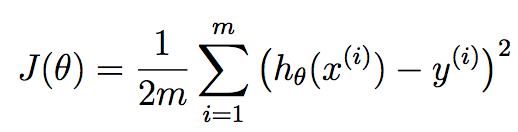
Where $h (\theta)$ is the predicted values.

In [8]:
def cost1D(Y,Y_pred):
    """
    Squared Error Cost Function:
    Y is 1D array of actual values
    y_pred is 1D array of predicted values
    
    """
    m = len(Y)
    cost = sum((Y-Y_pred)**2)/(2*m)
    
    return cost
    
    

In [9]:
# Let's find out the cost 

cost1D(Y,y_pred)

14.25

Cost is high because the predicted values are incorrect.

Now we need gradient decent algorithm for finding optimal values for weights and baises.We will use gradient decent algorithm for finding optimal values of weight and bias. Following figure shows the gradient decent process, It start with the initialized weights and biases and move toward the minima after each derivative.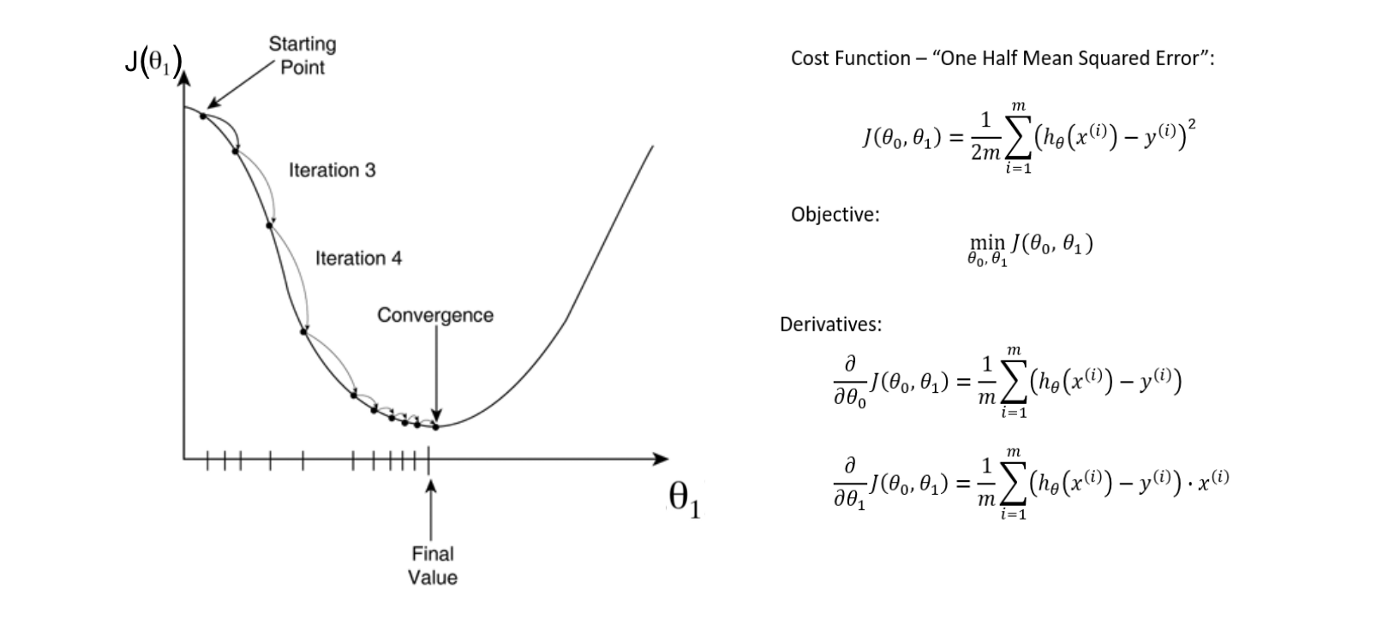

Let's implement this algorithm. 

In [9]:
def decent1D(Y_act,Y_pred,X):
    """
    decent1D: To find partial differential of cost function wrt weight and bais
    Y_act: Actual values 1D
    Y_pred: Predicted values 1D
    X: Input values 1D
    """
    m = len(Y_act)
    dw = np.dot((Y_act - Y_pred),X)/m
    db = sum(Y_act-Y_pred)/m
    
    
    return (dw,db)

In [10]:
dw,db =decent1D(Y,y_pred,X)
print(f" dJ wrt dw is {dw} \n dJ wrt to db is {db}")

 dJ wrt dw is 28.5 
 dJ wrt to db is 4.5


we completed all the individual parts of the linear regression algorithm now all we have to do is to combine it and find the optimal weight and bais values

In [11]:
# random initialize the weight and bais 
def linregg(X,Y):
    w = 0
    b=0
    alpha = 0.001   # Learning rate
    iteration =0
    J=[]

    while (iteration <10000):

        y_pred = pred1D(X,w,b)
        cost = cost1D(Y,y_pred)   # mean square error
        J.append(cost)
        (dw,db) = decent1D(Y,y_pred,X)

        w = w + alpha*dw
        b =b + alpha*db
        iteration +=1

    
    return (y_pred,J,w,b)

In [13]:
(y_pred,J,w,b) = linregg(X,Y)
print(f"Predicted Vales are {y_pred}")

Predicted Vales are [ 1.90265059  3.91817536  5.93370013  7.9492249   9.96474967 11.98027445
 13.99579922 16.01132399 18.02684876 20.04237353]


In [14]:
print(f"Final weight is {w} \nFinal bais is {b}")

Final weight is 2.0155203874235736 
Final bais is 1.9026780783344448


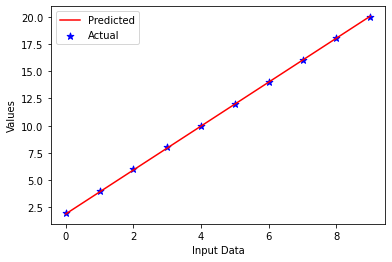

In [15]:
# Ploting both actual and predicted values
plt.scatter(X,Y,s=50,c='blue',marker="*",label="Actual")
plt.plot(X,y_pred,c='red',label = 'Predicted')
plt.xlabel("Input Data")
plt.ylabel("Values")
plt.legend()
plt.show()

The predicted values completly fits the actual values. Now let's see how cost changes with the iterations

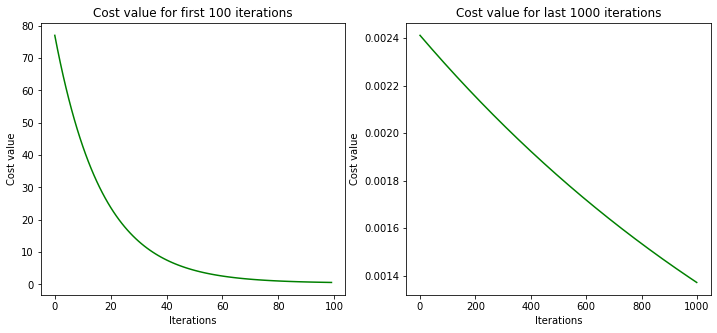

In [16]:
plt.figure(figsize=(12,5))
plt.subplot(1,2,1)
plt.title ("Cost value for first 100 iterations")
plt.plot(J[:100],c='green')
plt.xlabel("Iterations")
plt.ylabel("Cost value")

plt.subplot(1,2,2)
plt.title ("Cost value for last 1000 iterations")
plt.plot(J[9000:10000],c='green')
plt.xlabel("Iterations")
plt.ylabel("Cost value")
plt.show()

Awesome! We created a simplest linear regression model, Now let's try some thing challanging

### Test 02

For the second test let's generate random 100 values using between 1 to 1000

In [39]:
X2 = np.random.randint(0,1000,100)  # Randomly generate 100 value for X and Y
Y2 = np.random.randint(0,1000,100)
X2 = X2.astype(float)
Y2 = Y2.astype(float)
X2.sort() # sorting for the purpose of getting almost a linear relation
Y2.sort()

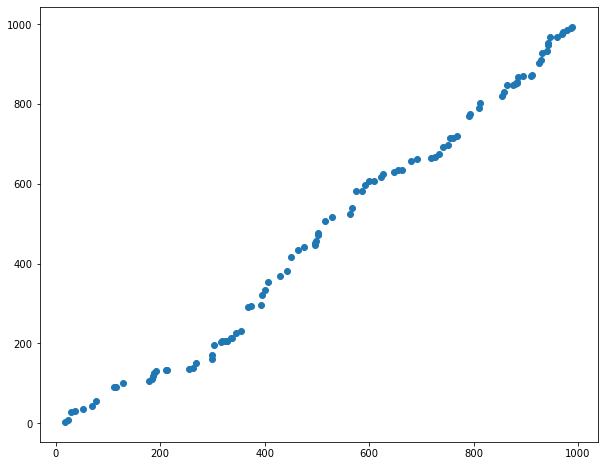

In [24]:
plt.figure(figsize=(10,8))
plt.scatter(X2,Y2)
plt.show()

Great! We have data with almost linear relation between X and Y, Let's see how gerenate a linear regression model for these values

In [25]:
(y_pred,J,w,b) = linregg(X2,Y2)
print(f"Final weight is {w} \nFinal bais is {b}")

C:\Users\ADMINI~1\AppData\Local\Temp/ipykernel_11404/82967689.py:9: RuntimeWarning: overflow encountered in square
  cost = sum((Y-Y_pred)**2)/(2*m)
C:\Users\ADMINI~1\AppData\Local\Temp/ipykernel_11404/82967689.py:9: RuntimeWarning: overflow encountered in double_scalars
  cost = sum((Y-Y_pred)**2)/(2*m)
C:\Users\ADMINI~1\AppData\Local\Temp/ipykernel_11404/3180340658.py:16: RuntimeWarning: invalid value encountered in double_scalars
  w = w + alpha*dw


Final weight is nan 
Final bais is nan


It returns nan for weight and bais the reason is that the value has a huge deviation ranging from 0 t0 1000, which makes it hard to find optimal values using gradient decent. One popular way to solve it is using normalization technique which reduce it value between 0 and 1, but 0 to 1 is very small and the variation is high in the value which can result in slow conversion. To avoid that lets normalize the value between 0 to 10.


In [35]:
def Normm(X,Y):
    
    """
    Normalizes values to [0,10] for better prediction
    X is 1D array
    Y is 1D array
    """
    
    X = (X/(X.max()))*10
    Y = (Y/(Y.max()))*10
    return (X,Y)

In [44]:
X_mod = X2.copy()
Y_mod = Y2.copy()
(X_mod,Y_mod) = Normm(X_mod,Y_mod) # Normalizes values
print (f"Normalized X values are {X_mod[:10]} \n and Normalize Y values are {Y_mod[:10]}")

Normalized X values are [0.13013013 0.13013013 0.86086086 1.12112112 1.21121121 1.41141141
 1.44144144 1.45145145 1.55155155 1.57157157] 
 and Normalize Y values are [0.12121212 0.24242424 0.25252525 0.42424242 0.45454545 0.54545455
 0.60606061 0.62626263 0.64646465 0.66666667]


In [45]:
(y_pred2,J,w,b) = linregg(X_mod,Y_mod)        # Making Predictions
print(f"First 10 predicted values are {y_pred2[:10]}")

First 10 predicted values are [-0.80555023 -0.80555023 -0.05699563  0.20961286  0.30190041  0.50698387
  0.53774638  0.54800056  0.65054228  0.67105063]


In [38]:
print(f"Final weight is {w} \nFinal bais is {b}")

Final weight is 1.025722732796742 
Final bais is -0.3813628225705097


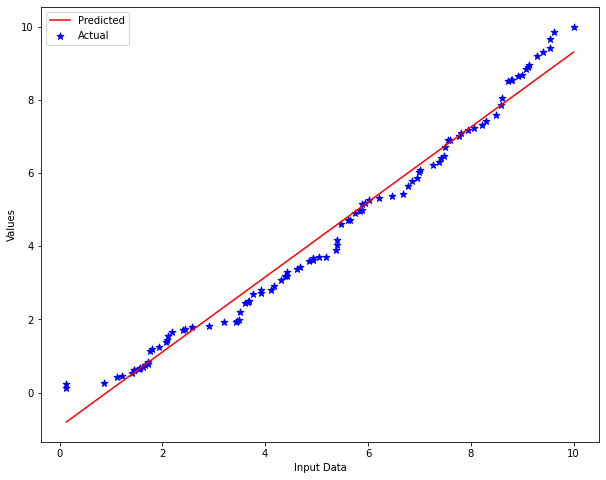

In [46]:
# Ploting both actual and predicted values
plt.figure(figsize=(10,8))
plt.scatter(X_mod,Y_mod,s=50,c='blue',marker="*",label="Actual")
plt.plot(X_mod,y_pred2,c='red',label = 'Predicted')
plt.xlabel("Input Data")
plt.ylabel("Values")
plt.legend()
plt.show()

Awesome! It almost Approximate the data points. Now lets check the cost value.

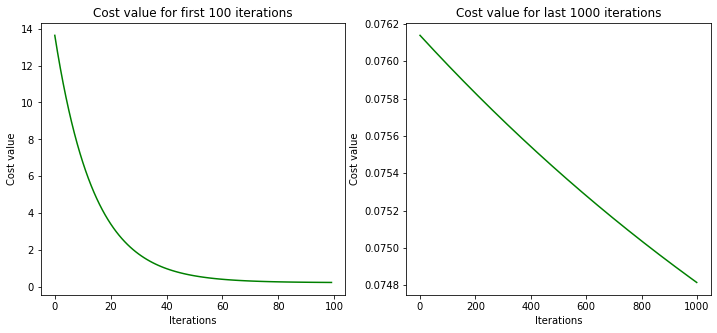

In [47]:
plt.figure(figsize=(12,5))
plt.subplot(1,2,1)
plt.title ("Cost value for first 100 iterations")
plt.plot(J[:100],c='green')
plt.xlabel("Iterations")
plt.ylabel("Cost value")

plt.subplot(1,2,2)
plt.title ("Cost value for last 1000 iterations")
plt.plot(J[9000:10000],c='green')
plt.xlabel("Iterations")
plt.ylabel("Cost value")
plt.show()

This concludes our second test. Now lets try something more challenging. 

### Test 03

For this one lets try polynominal value.

In [48]:
X3 = np.random.randint(0,1000,100)  # Randomly generate 100 value for X and Y
Y3 = np.random.randint(0,1000,100)**3  # Third Order Polynominal as Y
X3.sort() # sorting for the purpose of getting almost a linear relation
Y3.sort()

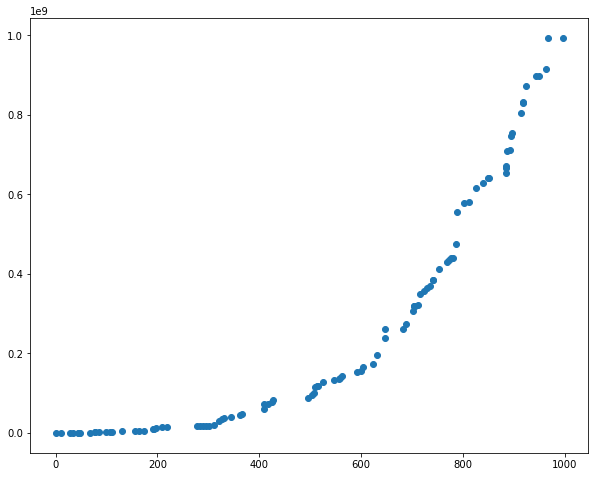

In [49]:
plt.figure(figsize=(10,8))
plt.scatter(X3,Y3)
plt.show()

Uptill now the functions we created had only one feature but now lets extent those function to work with multi - features.

In [50]:
def prednD(X,w,b):
        
    """ 
        In this function:
        X is (m,n) np array where n is the number of features
        Y is 1D np array
        w (n,) weights for each feature
        b (bias) is also a single value
        
        Y = w*X+b
    """
    try:
        m = X.shape[1]

        temp=np.zeros(m)

        n= w.shape[0]

        for i in range(n):
            temp=+X[i,:]*w[i]

            Y=temp+b  

    except IndexError:
        Y = X*w +b

    return Y
    

Generalized Cost Value

In [51]:
def costnD(Y,Y_pred):
    """
    Squared Error Cost Function:
    Y is 1D array of actual values
    y_pred is 1D array of predicted values
    
    """
    m = len(Y)
    cost = sum((Y-Y_pred)**2)/(2*m)
    
    return cost
    
    

 Now we need Genralized gradient decent algorithm for finding optimal values for weights and baises.

In [52]:
def decentnD(Y_act,Y_pred,X):
    """
    decent1D: To find partial differential of cost function wrt weights and bais
    Y_act: Actual values 1D
    Y_pred: Predicted values 1D
    X: (n,m) Input values nD
    """
    m = len(Y_act)
    n = X.shape[0]
    dw = np.zeros(n)
    for i in range(n):
        
        dw[i] = np.dot((Y_act - Y_pred),X[i,:])/m
    
    
    
    db = sum(Y_act-Y_pred)/m
    
    return (dw,db)

Generalized Normalization function

In [53]:
def Normmn(X,Y):
    
    """
    Normalizes values to [0,10] for better prediction
    X is nD array
    Y is 1D array
    """
    n = X.shape[0]
    
    for i in range(n):
        X[i] = (X[i]/(X[i].max()))*10
    
    Y = (Y/(Y.max()))*10
    return (X,Y)

Now Combining all of the function to build a multi-dimensional linear regression model

In [54]:
def linreggn(X,Y):
    
    """
    Performing Linear regression 
    X is array of freatures
    Y are the actual values
    
    """
     
    m = len(Y)            # Number of examples
    n = X.shape[0]        # Number of features   
    w = np.zeros(n)       # Initialized features
    b=np.array([0])       # Initialized bais
    alpha = 0.01   # Learning rate
    iteration =0
    J=[]

    while (iteration <10000):

        y_pred = prednD(X,w,b)
        cost = costnD(Y,y_pred)
        J.append(cost)
        (dw,db) = decentnD(Y,y_pred,X)

        w = w + alpha*dw
        b =b + alpha*db
        iteration +=1

    
    return (y_pred,J,w,b)

In [55]:
X_mod = np.array([X3,X3**2,X3**3]).astype(float) # Creating modified features by adding Multiple polynominal features

(X_mod,Y3) = Normmn(X_mod,Y3) # Normalizing all the features

(y_pred,J,w,b) = linreggn(X_mod,Y3) # Performing Linear regression

print(f"Final weights are {w} \nFinal bais is {b}")

Final weights are [-18.37404049  -7.97125503   1.03677849] 
Final bais is [-0.16215424]


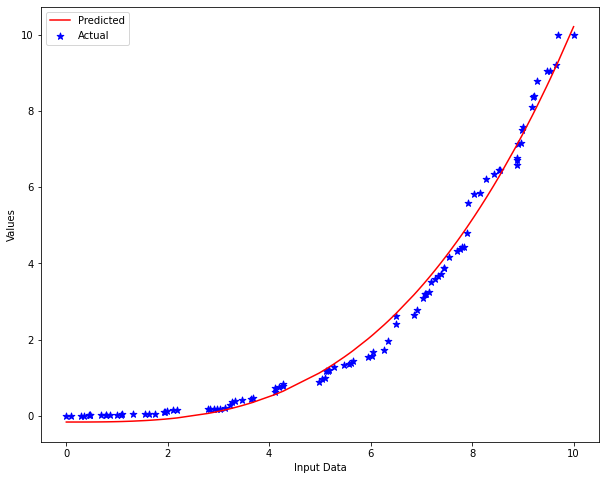

In [56]:
# Ploting both actual and predicted values
plt.figure(figsize=(10,8))
plt.scatter(X_mod[0,:],Y3,s=50,c='blue',marker="*",label="Actual")
plt.plot(X_mod[0,:],y_pred,c='red',label = 'Predicted')
plt.xlabel("Input Data")
plt.ylabel("Values")
plt.legend()
plt.show()

The Prediction is outstanding !!!

Now let's see how cost changes with the iterations

Text(0, 0.5, 'Cost value')

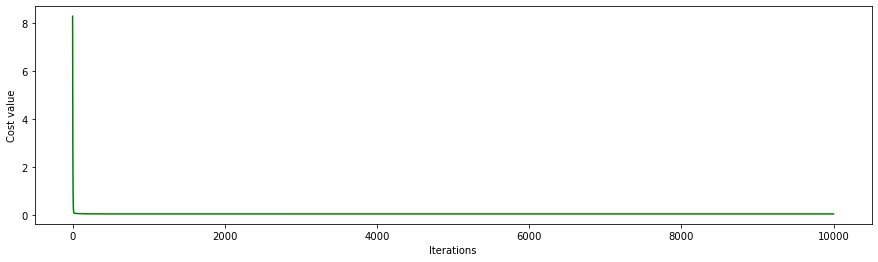

In [57]:
plt.figure(figsize=(15,4))
plt.plot(J,c='green')
plt.xlabel("Iterations")
plt.ylabel("Cost value")


This Conclude our task. We build simple 1D linear regression model from scratch then extend it to use for multiple input features. The predicted values almost matches the actual values and cost is very low at the end. Once we build this model we can also use it for multiple linear regression where input features contain independent variables. We will do it in the next session. Ciao for now. Have a great day :)